In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import urllib3
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
import seaborn as sns
import pandas as pd

In [ ]:
scholar = 'https://scholar.google.com/citations?user=x6fNSxcAAAAJ&hl=en'
nodes=100

In [ ]:
def getGraph(seed, Nmax):
    urls = defaultdict(int)
    urls[seed]+=1
    newUrls = [seed]
    G = nx.DiGraph()

    def coAuthors(url):
        print(url)
        coUrls = []
        coNames = []
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        s = soup.body.findAll('a', {"tabindex": "-1"})
        egoName = soup.body.find('div', {"id": "gsc_prf_in"}).text
        print(egoName)
        print("******")
        if s:
            for i in s:
                if i.text=="Sort by citations" or i.text=="Sort by year" or i.text=="Sort by title":
                  continue
                coNames.append(i.text)
                #for network plot
                coUrls.append('http://scholar.google.nl'+ i['href'])
        for j in coUrls:
            urls[j] += 0
        for m in coNames:
            G.add_edge(egoName.split(',')[0], m.split(',')[0], weight = 1)
        return coUrls

    while newUrls:
        for k in urls.keys():
            # update url.values() first
            urls[k] += 1
        addUrls = []
        # get new-added authors, may have duplications.
        for i in newUrls:

            #coAuthors(i)
            coUrls = coAuthors(i)
            if coUrls:
                for j in coUrls:
                    addUrls.append(j)
        for m in set(addUrls):
            # get rid of the duplications
            urls[m] += 0
        newUrls = [k for k, v in urls.items() if v <= 1]
        # This is for updating the new coauthors and avoid the deadloop: a->b->a->......
        addUrls = []
        print(len(urls.keys()))
        if len(urls.keys()) > Nmax:
            print('more than '+str(Nmax)+' people now, break')
            break
        print(newUrls)
    return G


In [ ]:
def getName(seed, Nmax):
    #urls = defaultdict(int)
    G = nx.DiGraph()
    response = requests.get(seed)
    soup = BeautifulSoup(response.content, "html.parser")
    egoName = soup.body.find('div', {"id": "gsc_prf_in"}).text
    print(egoName)
    return egoName

In [ ]:
#get Name of the author
name = getName(scholar, nodes)

Justin Wolfers


In [ ]:
#get coauthor List
g = getGraph(scholar, nodes)

https://scholar.google.com/citations?user=x6fNSxcAAAAJ&hl=en
Justin Wolfers
******
18
['http://scholar.google.nl/citations?user=rN1w41IAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=x8wsLTcAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=xwATNO8AAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=NaSxLIQAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=QtVE6DwAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=DhflKwEAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=Ga0i--0AAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=9nDqa0EAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=ddq2_gkAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=S2t1x2oAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=GYmUFP8AAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=-x0qMAcAAAAJ&hl=en&oe=ASCII', 'http://scholar.google.nl/citations?user=aXGTpLgAAAAJ&hl=en&o

In [ ]:
def plot_(g):
    plt.figure(figsize = (30, 30))
    pos = nx.spring_layout(g)
    nx.draw_networkx_labels(g, pos, font_color='k', font_size = 14)
    nx.draw(g, pos, node_size = 20, edge_color = 'grey', width = 0.4, arrows = True)
    #str1=name
    str2="'s Google Scholar Network"
    myTitle=str(name)+str2
    plt.title(myTitle, fontsize=40)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()

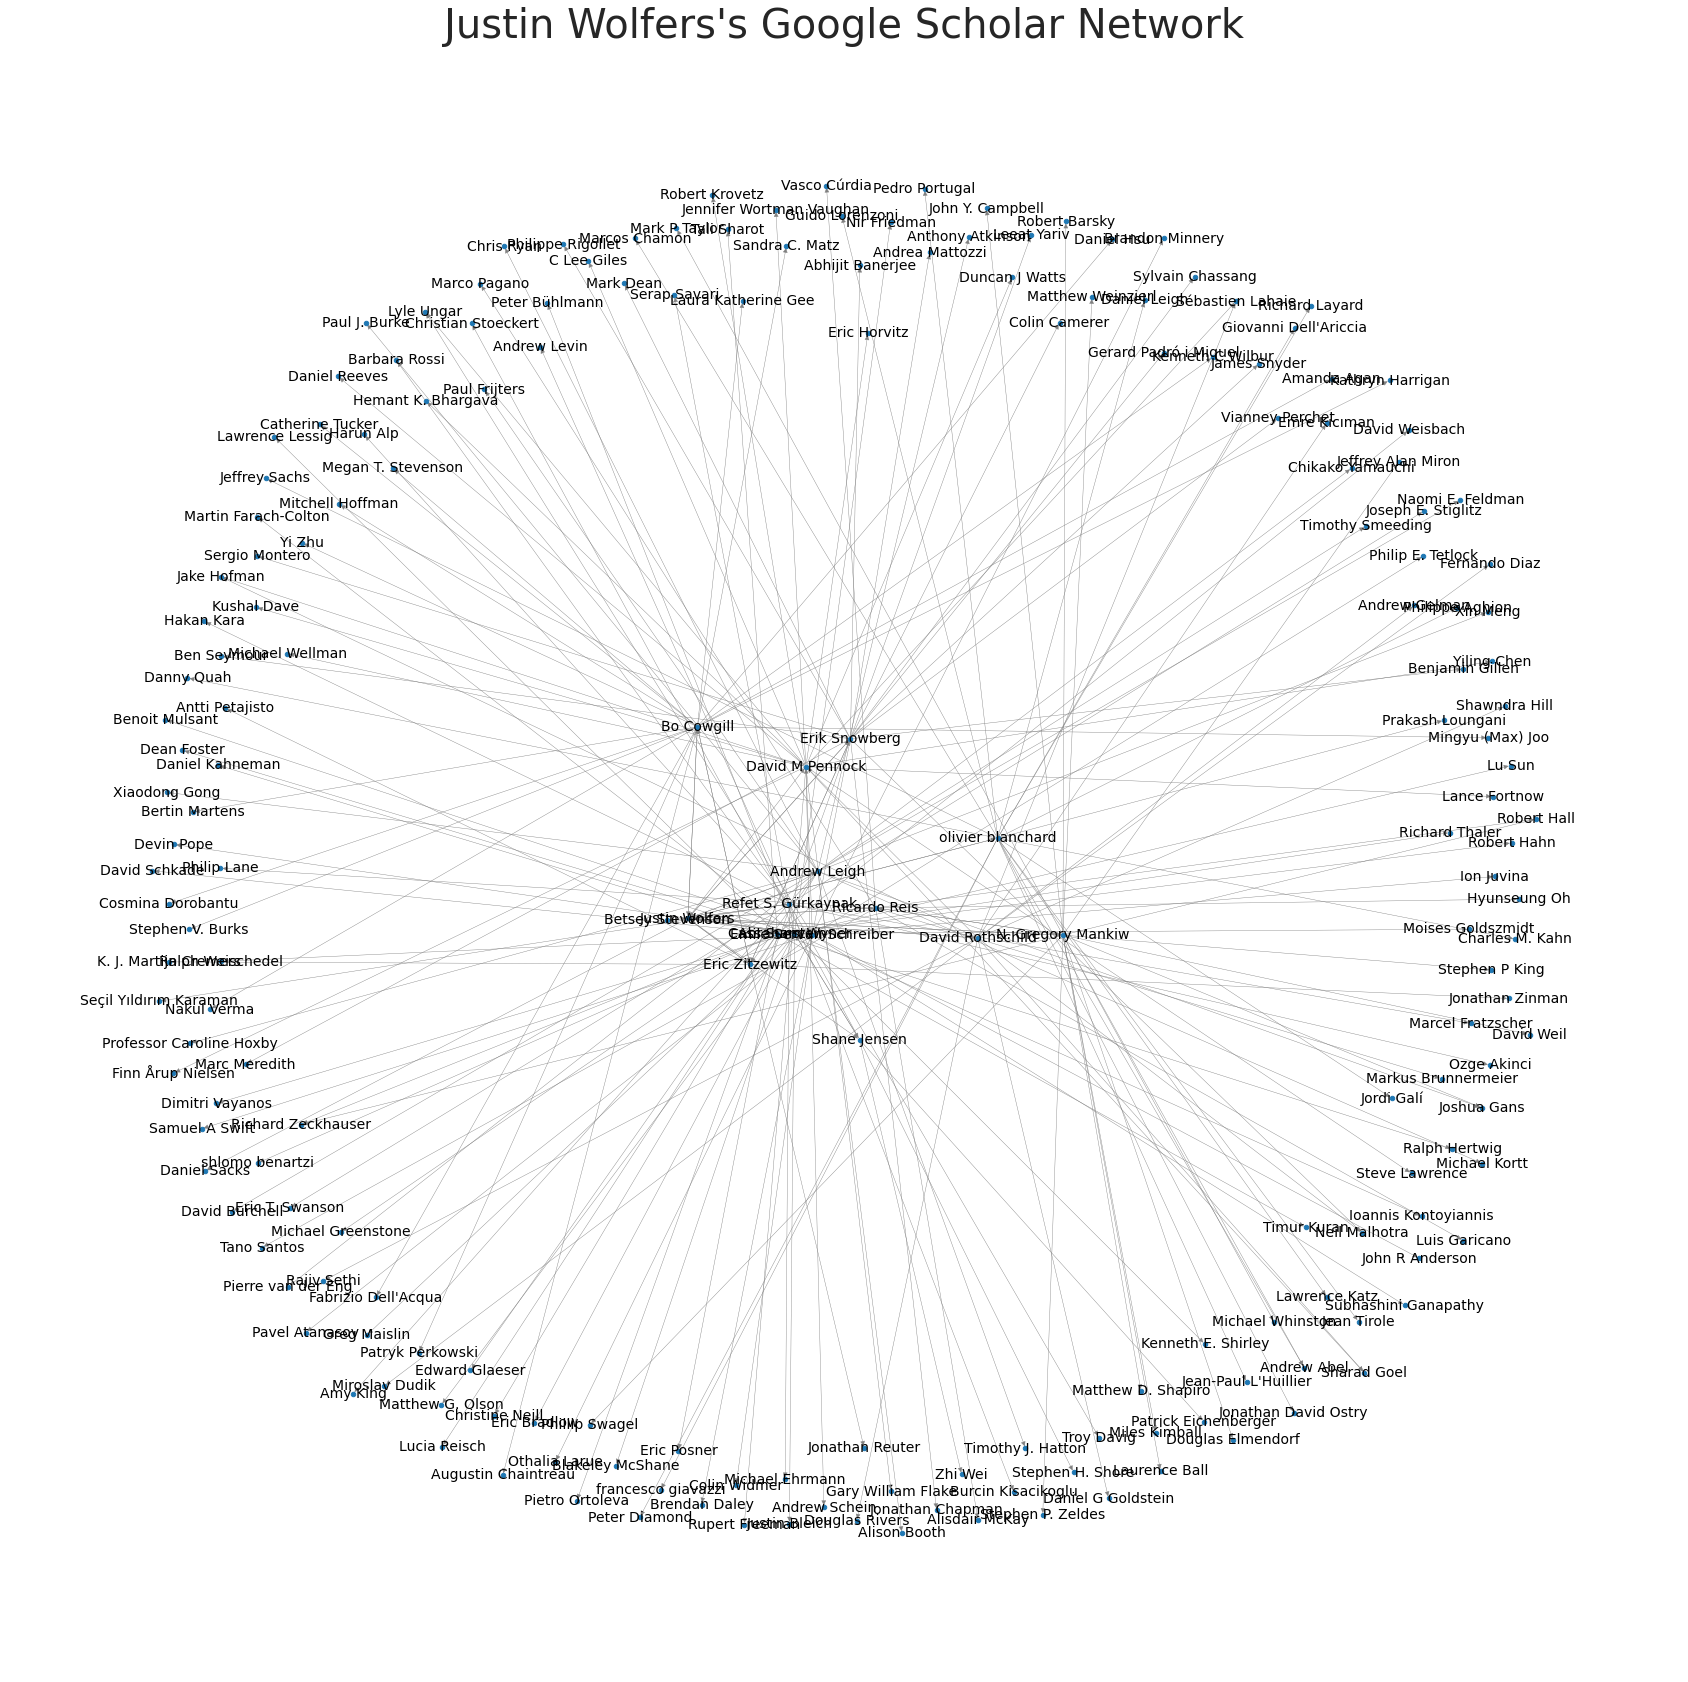

In [ ]:
plot_(g)

In [ ]:
#create Important subnetwork
def page_Rank(G):
    print("Google Page Rank Algoritham\n")
    rank = nx.pagerank(G)
    for k,v in rank.items() :
        print("Page Rank Centrality :",k,'\t',v)

    r = [x for x in rank.values()]
    rsum = sum(r)
    rlen = len(r)
    rfac = rsum/rlen
    Gt = G.copy()

    for k, v in rank.items():
        if v < rfac:
            Gt.remove_node(k)
    return Gt

In [ ]:
Gt = page_Rank(g)

Google Page Rank Algoritham

{'Justin Wolfers': 0.012464857631251623, 'Betsey Stevenson': 0.005152655471593824, 'Eric Zitzewitz': 0.005870236016779725, 'Erik Snowberg': 0.005865365393658772, 'Andrew Leigh': 0.005152655471593824, 'olivier blanchard': 0.005152655471593824, 'Daniel Sacks': 0.005152655471593824, 'N. Gregory Mankiw': 0.005534383169486369, 'Ricardo Reis': 0.005387891607644592, 'Cass Sunstein': 0.005152655471593824, 'Refet S. Gürkaynak': 0.005152655471593824, 'Devin Pope': 0.005152655471593824, 'Bo Cowgill': 0.005865365393658772, 'David Rothschild': 0.005152655471593824, 'Emile Servan-Schreiber': 0.005152655471593824, 'David M Pennock': 0.005778587433233428, 'Shane Jensen': 0.0054757539585080835, 'Abraham Wyner': 0.0060836993163222285, 'Jonathan Reuter': 0.005243642598480743, 'Antti Petajisto': 0.005243642598480743, 'K. J. Martijn Cremers': 0.005243642598480743, 'Jonathan Zinman': 0.005243642598480743, 'Sylvain Chassang': 0.004780184855721814, 'Pietro Ortoleva': 0.00478018485

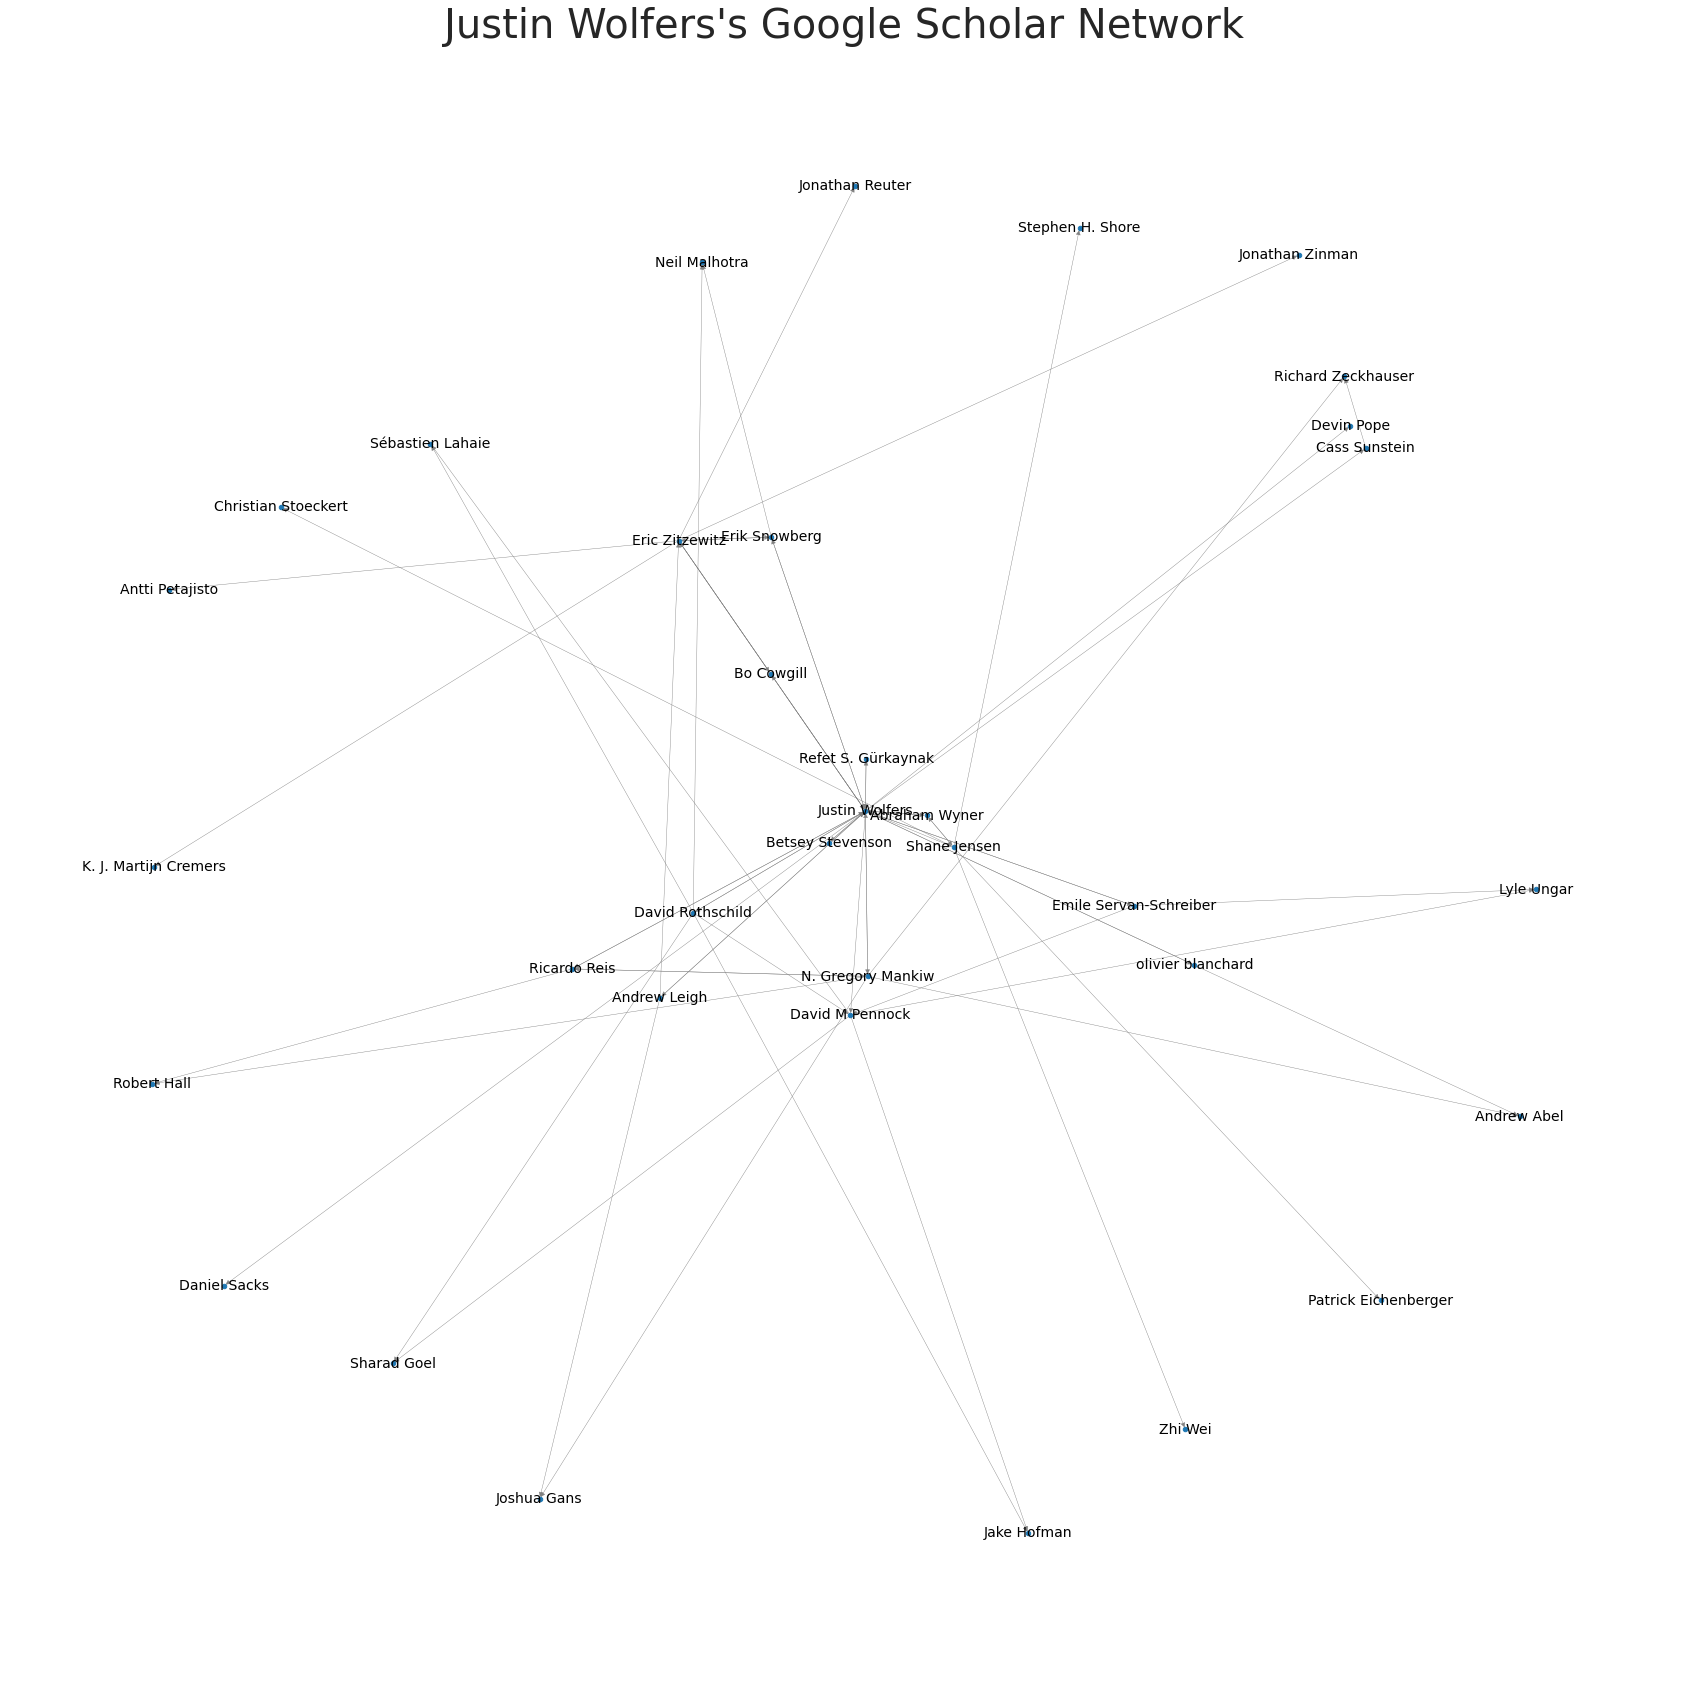

In [ ]:
plot_(Gt)

In [ ]:
mylist=[]
degree =  g.degree()
for k,v in degree :
    print('Degree of Each Node :',k,'\t',v)
    mylist.append(v)

Degree of Each Node : Justin Wolfers 	 29
Degree of Each Node : Betsey Stevenson 	 2
Degree of Each Node : Eric Zitzewitz 	 11
Degree of Each Node : Erik Snowberg 	 22
Degree of Each Node : Andrew Leigh 	 21
Degree of Each Node : olivier blanchard 	 21
Degree of Each Node : Daniel Sacks 	 1
Degree of Each Node : N. Gregory Mankiw 	 22
Degree of Each Node : Ricardo Reis 	 14
Degree of Each Node : Cass Sunstein 	 16
Degree of Each Node : Refet S. Gürkaynak 	 14
Degree of Each Node : Devin Pope 	 1
Degree of Each Node : Bo Cowgill 	 22
Degree of Each Node : David Rothschild 	 15
Degree of Each Node : Emile Servan-Schreiber 	 15
Degree of Each Node : David M Pennock 	 23
Degree of Each Node : Shane Jensen 	 7
Degree of Each Node : Abraham Wyner 	 18
Degree of Each Node : Jonathan Reuter 	 1
Degree of Each Node : Antti Petajisto 	 1
Degree of Each Node : K. J. Martijn Cremers 	 1
Degree of Each Node : Jonathan Zinman 	 1
Degree of Each Node : Sylvain Chassang 	 1
Degree of Each Node : Pietr

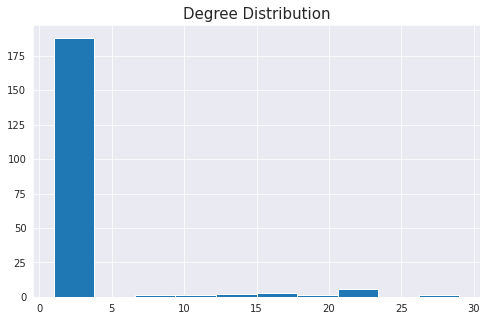

In [ ]:
plt.figure(figsize = (8, 5))
plt.hist(mylist)
plt.title("Degree Distribution", fontsize = 15)
plt.show()

In [ ]:
centality_value = []
centrality =  nx.degree_centrality(g)
for each in centrality.items():
    print('Degree Centrality: ', each[0], '\t', each[1])
    centality_value.append(each[1])

Degree Centrality:  Justin Wolfers 	 0.14356435643564355
Degree Centrality:  Betsey Stevenson 	 0.009900990099009901
Degree Centrality:  Eric Zitzewitz 	 0.054455445544554455
Degree Centrality:  Erik Snowberg 	 0.10891089108910891
Degree Centrality:  Andrew Leigh 	 0.10396039603960396
Degree Centrality:  olivier blanchard 	 0.10396039603960396
Degree Centrality:  Daniel Sacks 	 0.0049504950495049506
Degree Centrality:  N. Gregory Mankiw 	 0.10891089108910891
Degree Centrality:  Ricardo Reis 	 0.06930693069306931
Degree Centrality:  Cass Sunstein 	 0.07920792079207921
Degree Centrality:  Refet S. Gürkaynak 	 0.06930693069306931
Degree Centrality:  Devin Pope 	 0.0049504950495049506
Degree Centrality:  Bo Cowgill 	 0.10891089108910891
Degree Centrality:  David Rothschild 	 0.07425742574257425
Degree Centrality:  Emile Servan-Schreiber 	 0.07425742574257425
Degree Centrality:  David M Pennock 	 0.11386138613861387
Degree Centrality:  Shane Jensen 	 0.034653465346534656
Degree Centrality: 

In [ ]:
avg_centrality =  sum(centrality.values())/len(centrality)
print('Average Degree Centrality: ', avg_centrality)

Average Degree Centrality:  0.011412963956494175


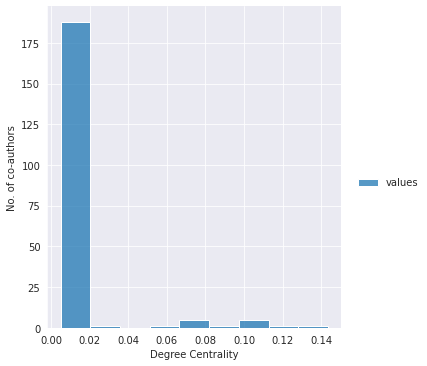

In [ ]:
#create dataframe
import pandas as pd
y=list(centrality.values())
x=list(centrality.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)

sns.set_style('darkgrid')
a=sns.displot(df1)
a.set_axis_labels(x_var="Degree Centrality", y_var="No. of co-authors")

In [ ]:
close = nx.closeness_centrality(g)
for each in close.items():
    print('Closeness Centrality: ', each[0], '\t', each[1])

Closeness Centrality:  Justin Wolfers 	 0.05975954738330976
Closeness Centrality:  Betsey Stevenson 	 0.03217821782178218
Closeness Centrality:  Eric Zitzewitz 	 0.03637537666810159
Closeness Centrality:  Erik Snowberg 	 0.03346534653465347
Closeness Centrality:  Andrew Leigh 	 0.03217821782178218
Closeness Centrality:  olivier blanchard 	 0.03217821782178218
Closeness Centrality:  Daniel Sacks 	 0.034653465346534656
Closeness Centrality:  N. Gregory Mankiw 	 0.03346534653465347
Closeness Centrality:  Ricardo Reis 	 0.03346534653465347
Closeness Centrality:  Cass Sunstein 	 0.034653465346534656
Closeness Centrality:  Refet S. Gürkaynak 	 0.03217821782178218
Closeness Centrality:  Devin Pope 	 0.034653465346534656
Closeness Centrality:  Bo Cowgill 	 0.03346534653465347
Closeness Centrality:  David Rothschild 	 0.03217821782178218
Closeness Centrality:  Emile Servan-Schreiber 	 0.03217821782178218
Closeness Centrality:  David M Pennock 	 0.03731911652703732
Closeness Centrality:  Shane J

In [ ]:
avg_closeness =  sum(close.values())/len(close)
print('Average Closeness: ', avg_closeness)

Average Closeness:  0.02602631327368453


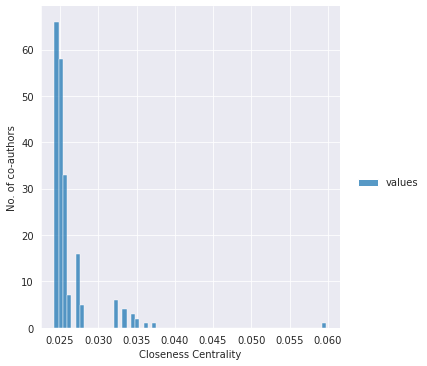

In [ ]:
y=list(close.values())
x=list(close.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)

sns.set_style('darkgrid')
a=sns.displot(df1)
a.set_axis_labels(x_var="Closeness Centrality", y_var="No. of co-authors")

In [ ]:
btwn = nx.betweenness_centrality(g, weight='weight')
for each in btwn.items():
    print('Betweeness Centrality: ', each[0], '\t', each[1])

Betweeness Centrality:  Justin Wolfers 	 0.05608919100865311
Betweeness Centrality:  Betsey Stevenson 	 0.0
Betweeness Centrality:  Eric Zitzewitz 	 0.0022084297982037007
Betweeness Centrality:  Erik Snowberg 	 0.005611382033725761
Betweeness Centrality:  Andrew Leigh 	 0.005578542928919758
Betweeness Centrality:  olivier blanchard 	 0.005898724200778287
Betweeness Centrality:  Daniel Sacks 	 0.0
Betweeness Centrality:  N. Gregory Mankiw 	 0.005122900349736466
Betweeness Centrality:  Ricardo Reis 	 0.0030294074183537757
Betweeness Centrality:  Cass Sunstein 	 0.004975124378109453
Betweeness Centrality:  Refet S. Gürkaynak 	 0.0038421752623023497
Betweeness Centrality:  Devin Pope 	 0.0
Betweeness Centrality:  Bo Cowgill 	 0.005763262893453525
Betweeness Centrality:  David Rothschild 	 0.0031320296208725354
Betweeness Centrality:  Emile Servan-Schreiber 	 0.0036697699620708343
Betweeness Centrality:  David M Pennock 	 0.006206590808334565
Betweeness Centrality:  Shane Jensen 	 0.0012807

In [ ]:
avg_betweenness =  sum(btwn.values())/len(btwn)
print('Average Betweenness: ', avg_betweenness)

Average Betweenness:  0.0005980195107960174


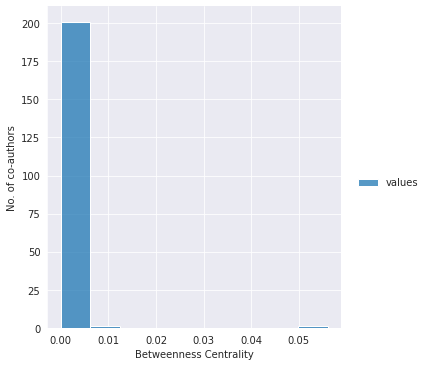

In [ ]:
y=list(btwn.values())
x=list(btwn.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)


sns.set_style('darkgrid')
a=sns.displot(df1)
a.set_axis_labels(x_var="Betweenness Centrality", y_var="No. of co-authors")

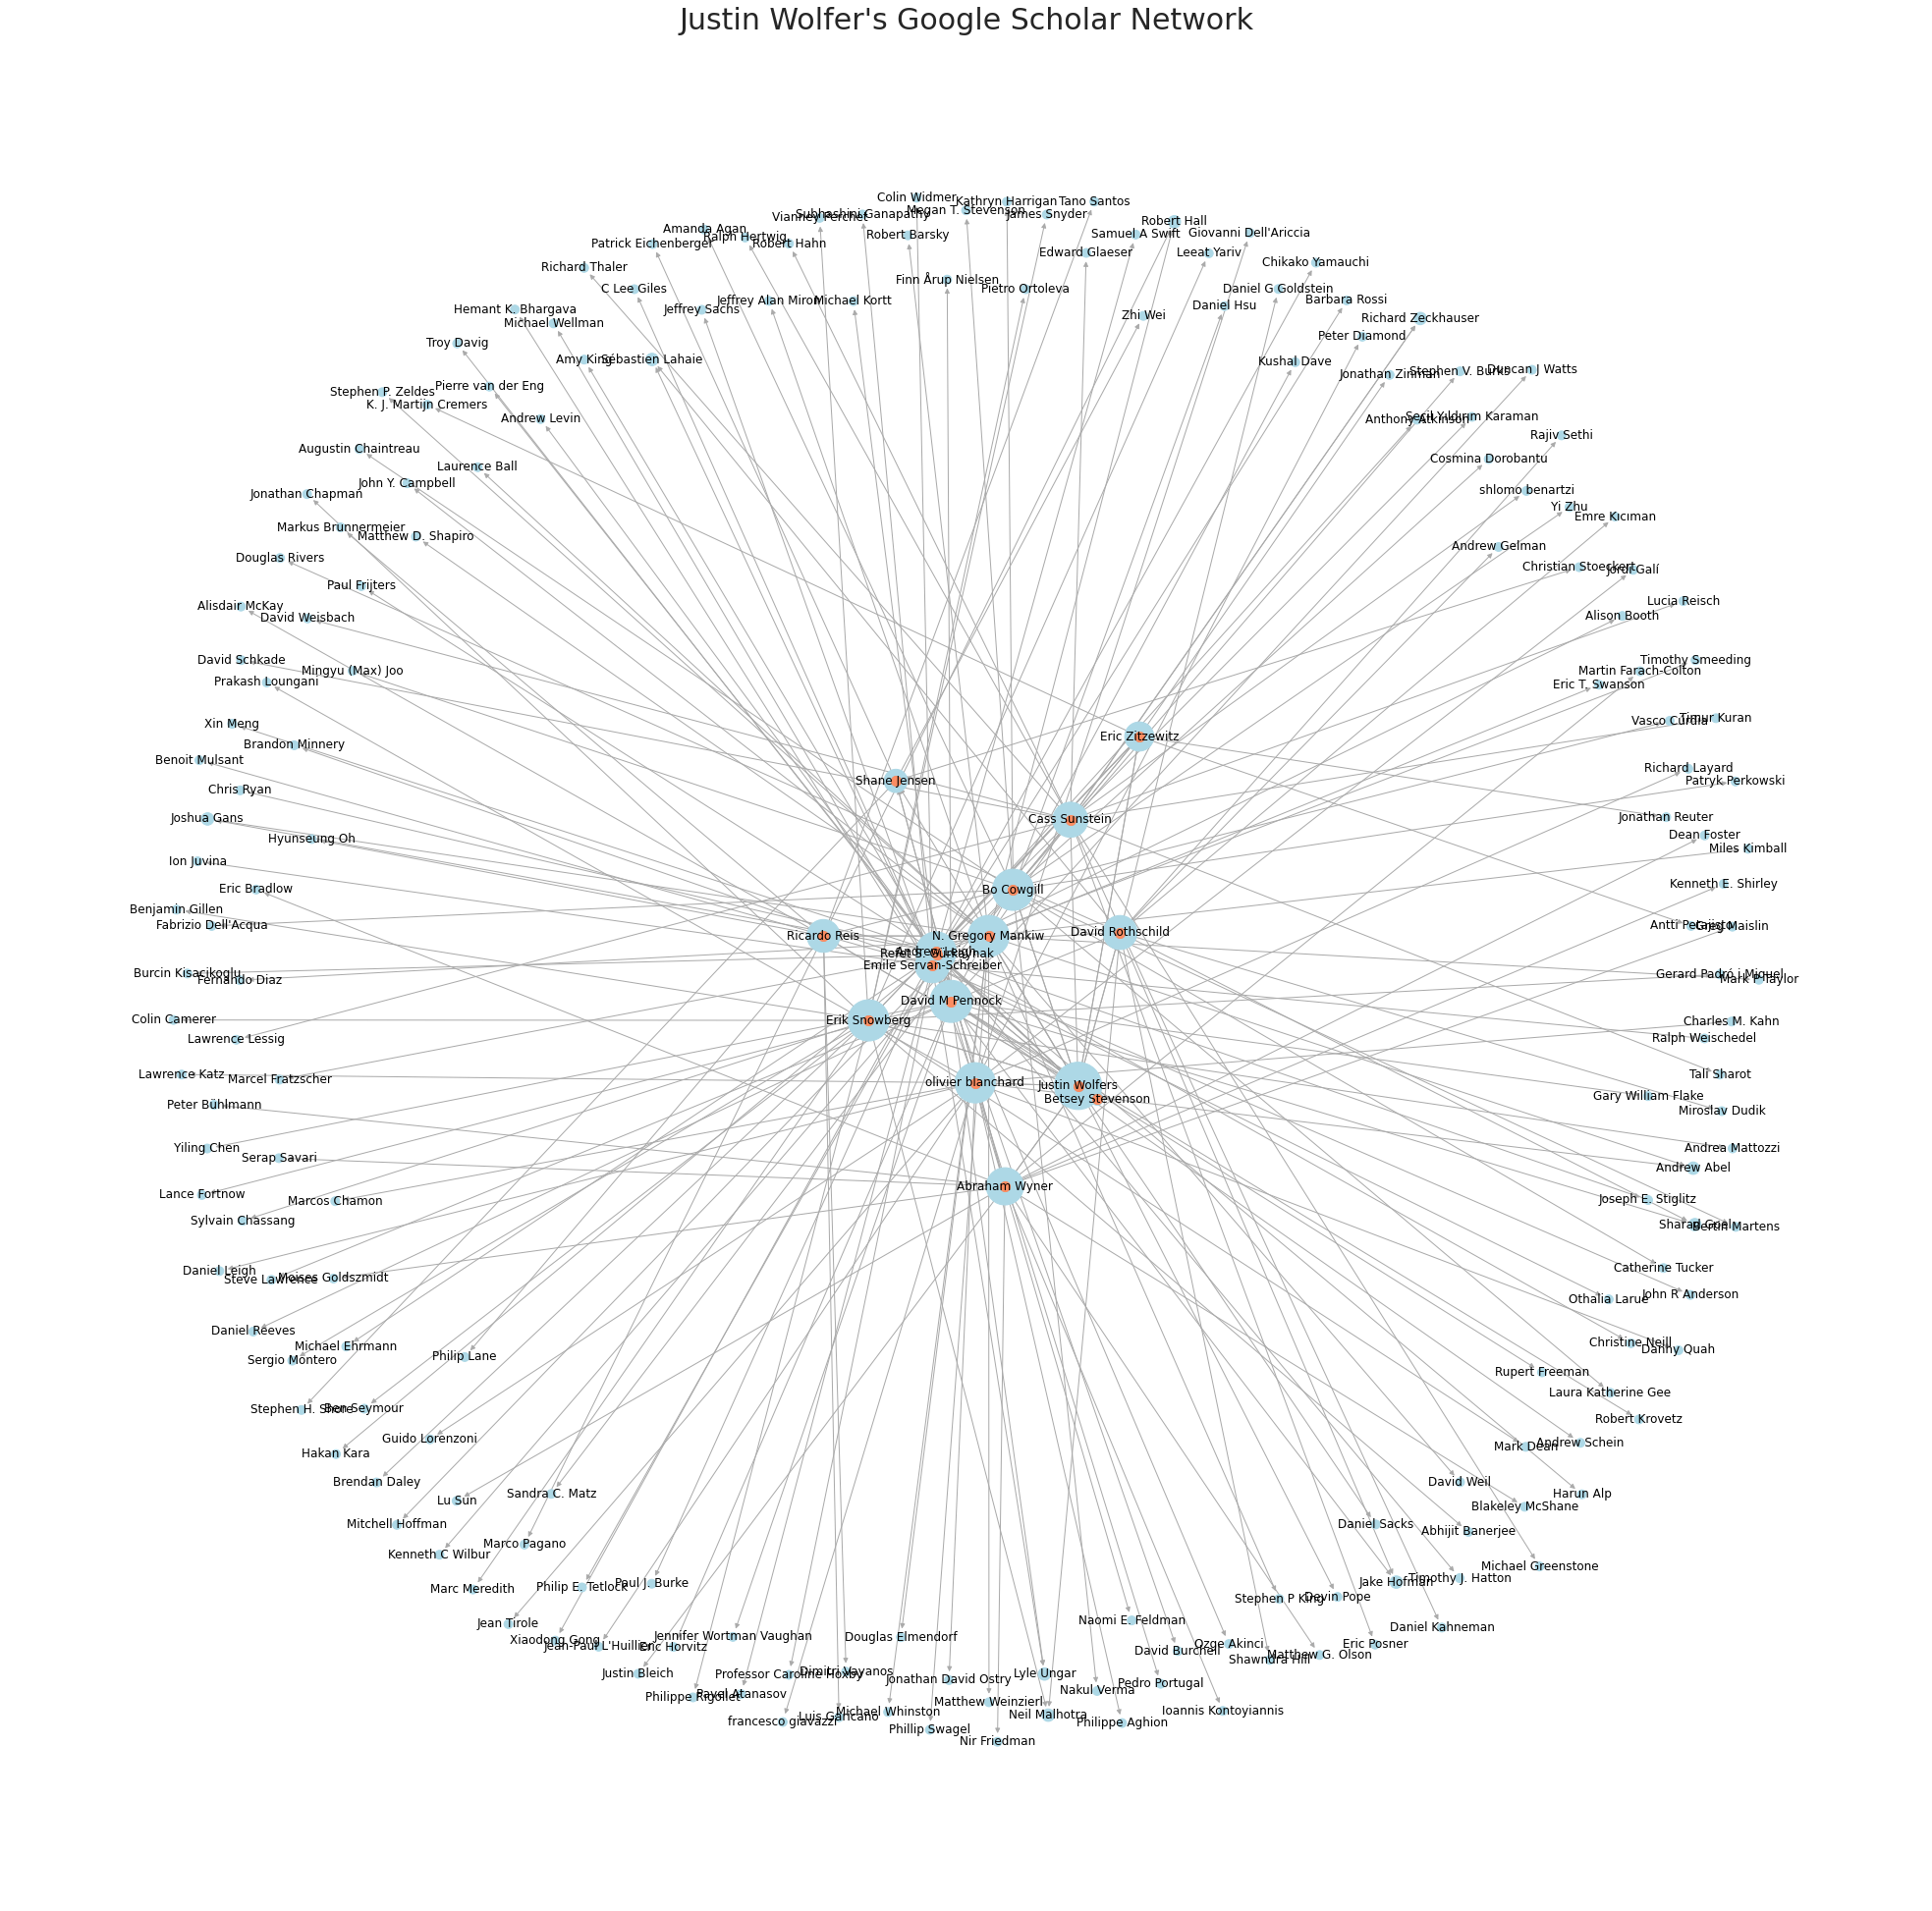

In [ ]:
def plot2(g, strng):
  plt.figure(figsize=(35, 35))

  # 1. Create the graph
  # df=pd.read_csv("aaa.csv", encoding= 'unicode_escape')
  # g=nx.from_pandas_edgelist(df, source='author', target='coauthors')
  df=nx.to_pandas_edgelist(g)
  #print(df)
  # 2. Create a layout for our nodes
  layout = nx.spring_layout(g,iterations=50)

  # 3. Draw the parts we want
  nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

  coauthor = [node for node in g.nodes() if node in df.target.unique()]
  size = [g.degree(node) * 80 for node in g.nodes() if node in df.target.unique()]
  nx.draw_networkx_nodes(g, layout, nodelist=coauthor, node_size=size, node_color='lightblue')

  people = [node for node in g.nodes() if node in df.source.unique()]
  nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

  high_degree_people = [node for node in g.nodes() if node in df.source.unique() and g.degree(node) > 1]
  nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

  coauthors_dict = dict(zip(coauthor, coauthor))
  nx.draw_networkx_labels(g, layout, labels=coauthors_dict)

  plt.axis('off')

  plt.title("Justin Wolfer's Google Scholar Network", fontsize=30)
  # 4. Tell matplotlib to show it
  plt.savefig(strng)
  plt.show()
plot2(g, "network.png")

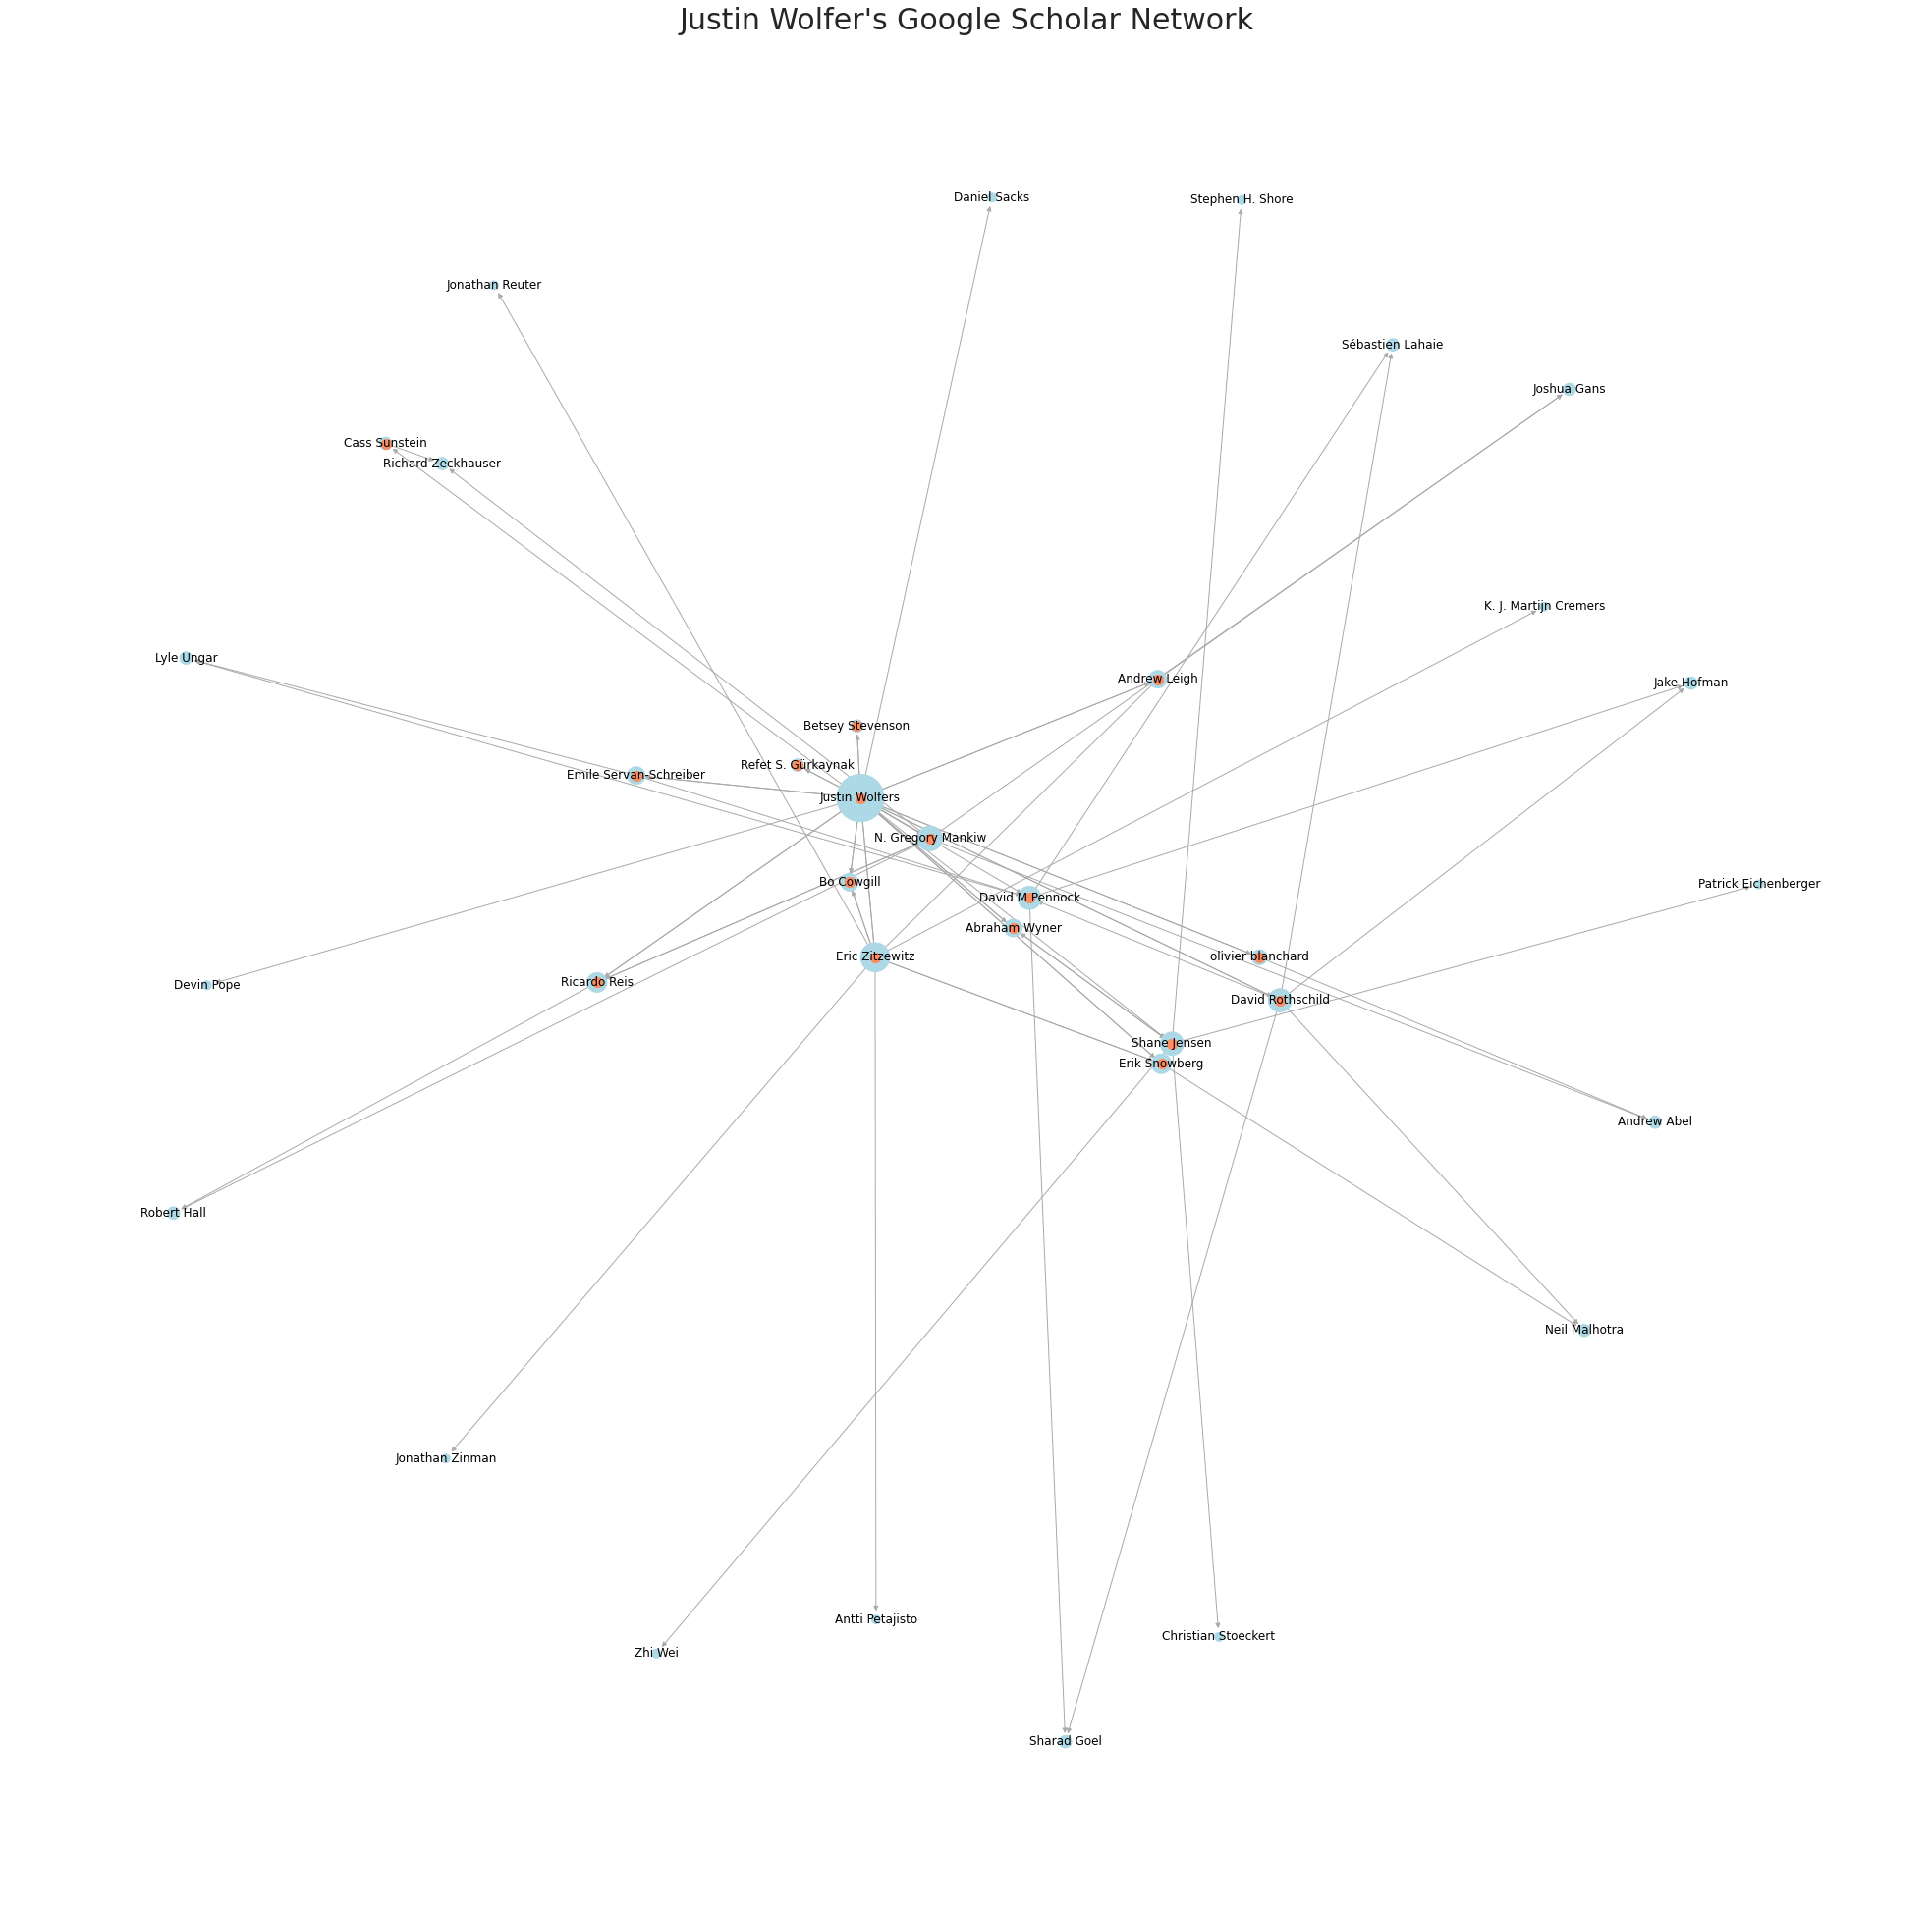

In [ ]:
plot2(Gt, "impnetwork.png")